![poster](poster.png)

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">ABSTRACT</h1>

This initiative aims to unveil underlying patterns within the abstracts of Springer articles, specifically those published in the Journal of Cloud Computing. The process involves initial tokenization and lemmatization of the abstracts. Subsequently, a term-document matrix will be generated using TF-IDF, where rows represent individual article abstracts and columns signify words present in the corpus. The next step involves extracting SVD components from this matrix, with the first 5 singular vectors shedding light on the primary 5 topics that encapsulate the essence of the corpus.

Following a meticulous analysis, the top 5 identified topics are as follows: Cloud Computing Efficiency, the Emergence of Edge Computing in China, Blockchain Integration in Cloud Services, Security Threats in Cloud Environments, and Overall Cloud Security. To sum up, the thematic landscape of Cloud Computing articles for the year 2023 revolves prominently around efficiency enhancement, the rise of edge computing, and the paramount importance of security measures.

Based on the results of this project, the recommendations are to use a bigger dataset, consider including cloud vendor-specific articles, try other dimensionality reduction techniques like LDA and NMF, and try using word embedding models like GloVe or Word2Vec.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">LIST OF TABLES AND FIGURES</h1>

**TABLES**

- Table 1: Raw Springer Data Sample
- Table 2: Expected DataFrame
- Table 3: Term-document matrix with min_df=0
- Table 4: Term-document matrix with min_df=1% of corpus
- Table 5: Term-document matrix with min_df=3% of corpus


**FIGURES**
- Figure 1: Methodology
- Figure 2: Most commonly occurring words in the corpus
- Figure 3: Retained words versus min_df
- Figure 4: Variance Explained and Cumulative Variance Explained
- Figure 5: Cloud Computing Efficiency
- Figure 6: Edge Computing Prevalence in China
- Figure 7: Blockchain on the Cloud
- Figure 8: Malicious Attacks on the Cloud
- Figure 9: General Cloud Security
- Figure 10: Springer Dataset on first 2 SV's

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080;border: 1px solid #ffffff; padding: 10px 0;">PRELIMINARIES</h1>

### What Is Latent Semantic Analysis?

"Latent Semantic Analysis (LSA) is an application of the SVD method to the text domain. In this case, the data matrix $D$ is an $n \times d$ document-term matrix containing normalized word frequencies in the $n$ documents, where $d$ is the size of the lexicon. No mean centering is used, but the results are approximately the same as PCA because of the sparsity of $D$. The sparsity of $D$ implies that most of the entries in $D$ or 0, and the mean values of each column are much smaller than the nonzero values." (Aggarwal, 2016)

#### Enhanced Performance
Within the text domain, the reduction in dimensionality achieved through LSA is notably significant. As an illustration, it's common to represent a lexicon-based corpus initially comprising 100,000 dimensions in a concise format of fewer than 300 dimensions.

LSA serves as a classic demonstration showcasing how the deliberate "loss" of information by discarding certain dimensions can remarkably enhance the quality of data representation.

#### Synonymy and Polysemy Challenges
The text domain grapples with two primary challenges: synonymy and polysemy. Synonymy denotes the existence of multiple words sharing the same meaning, while polysemy refers to instances where identical-looking words possess different meanings. This is the underlying reason why similarity-based applications often encounter inaccuracies.

LSA  stands out for its ability to effectively alleviate the disruptive effects of synonymy and polysemy, consequently refining the accuracy of text-based applications.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">PROBLEM STATEMENT</h1>

Springer.com is the official website for Springer, a leading global scientific, technical, and medical publisher. The website provides access to a wide range of academic and professional content, including books, journals, and reference works. Users can search for and purchase publications, access online resources, and stay updated on the latest research and developments in their field of interest.

This project aims to uncover latent features in the abstracts of articles in Springer’s Journal of Cloud Computing. In practical applications, this helps create better recommendations for researchers and private entities who want to be at the forefront of Cloud Computing. With LSA, we can identify documents that might not look related to the topic on a surface level but turn out to have a deeper relationship.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">SIGNIFICANCE OF THE STUDY</h1>

[Gartner Forecasts Worldwide Public Cloud End-User Spending to Reach Nearly $600 Billion in 2023](https://www.gartner.com/en/newsroom/press-releases/2023-04-19-gartner-forecasts-worldwide-public-cloud-end-user-spending-to-reach-nearly-600-billion-in-2023).[2] Companies are quickly moving from purely on-premise systems to an either partial or pure cloud-based existence. Just like any other discipline, trends in cloud computing research change rapidly as the business landscape constantly shifts. As consultants and strategists, we can use these results to help direct the cloud investments of companies towards subtopics that matter right now.

![methodology](methodology.png)

Figure 1: Methodology

1. Gather dataset comprising of Springer article metadata and an exemplar coming from a different source. 
2. Tokenize and lemmatize the abstract and the chosen exemplar.
3. Create matrix where features are **tokens in the documents** and rows are the abstracts of the articles.
4. Apply TF-IDF to the matrix in order to deemphasize frequently occurring words like "a", "and", "the", etc.
5. Apply truncated SVD on the document-term matrix.
6. Identify top 5 topics.
7. Evaluate the performance by interpreting the feature weights and cross-checking with domain knowledge.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">IMPORT LIBRARIES AND DEFINED FUNCTIONS</h1>

This section provides the essential libraries and functions required for data preparation, model building, analysis, and evaluation. This step establishes the groundwork for the subsequent analysis and modeling steps.

In [14]:
import datetime
import re
import math
import json
import requests
import pandas as pd
import numpy as np
import umap.umap_ as umap
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">CREATE THE DATABASE</h1>

The team utilized the Springer API to retrieve all articles from the Journal of Cloud Computing in the year 2023 (volume 12). The extracted information included DOI, title, publication date, subjects, and abstract, which will serve as the foundation for our analysis and subsequent studies.

In this project, the team adopted DOI as the primary identifier. DOI, which stands for Digital Object Identifier, is a unique alphanumeric string assigned to a digital object, such as a dataset, article, or other scholarly work. It serves the purpose of providing a persistent link to the object, thereby facilitating its easy retrieval and citation in academic research.

Additionally, the retrieved data was converted to a CSV file named "springer_dataset.csv". From this CSV file, a dataframe was created with DOI serving as the index, while title, publication_date, subjects, and abstracts are the column names.The team utilized the Springer API to retrieve all articles from the Journal of Cloud Computing in the year 2023 (volume 12). The extracted information included DOI, title, publication date, subjects, and abstract, which will serve as the foundation for our analysis in the subsequent sections.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">NULL AND MISSING VALUES</h1>

There are no null and missing values, hence further handling for this is not needed.

In [15]:
# fetch bearer token
#with open("auth_springer.json", "r") as f:
#    key = json.loads(f.read())["key"]

In [16]:
def get_articles():
    """Return list of all rows containing article information"""
    url = (f"http://api.springernature.com/openaccess/"
       f"json?q=(issn:2192-113X%20and%20volume:12)&api_key={key}")
    params = {"p": 100}
    rows = []
    last_date = None
    while True:
        temp = None
        response = requests.get(url, params=params).json()
        for r in response["records"]:
            rows.append({
                "doi": r["doi"],
                "title": r["title"],
                "publication_date": r["publicationDate"],
                "subjects": ','.join(r["subjects"]),
                "abstract": r["abstract"]["p"] if not isinstance(
                    r["abstract"], str) else ""
            })
        if last_date:
            temp = last_date
        if temp and temp == last_date:
            break
        last_date = str(
                datetime.datetime.strptime(
                rows[-1]["publication_date"], "%Y-%m-%d").date() - datetime.timedelta(
                    days=1)
                )
        if "onlinedatefrom" not in url:
            url = url.replace(
                ")&",
                f"%20and%20onlinedatefrom:2023-01-01%20onlinedateto:{last_date})&"
            )
        else:
            url = url.replace(temp, last_date)
    return rows

In [17]:
df = pd.read_csv("springer_dataset.csv")
df.set_index(["doi"], inplace=True)

In [18]:
display_df = df.iloc[0:1]
print("Raw data from the Springer API contains doi,"
      "title, publication_date, subjects, and abstract.")
display_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption('Table 1: Raw Springer Data Sample')

Raw data from the Springer API contains doi,title, publication_date, subjects, and abstract.


,title,publication_date,subjects,abstract
doi,,,,
10.1186/s13677-023-00550-3,Exploring cross-cultural and gender differences in facial expressions: a skin tone analysis using RGB Values,2023-11-20,"Computer Science,Computer Communication Networks,Special Purpose and Application-Based Systems,Information Systems Applications (incl.Internet),Computer Systems Organization and Communication Networks,Computer System Implementation,Software Engineering/Programming and Operating Systems","Facial expressions serve as crucial indicators of an individual's psychological state, playing a pivotal role in face-to-face communication. This research focuses on advancing collaboration between machines and humans by undertaking a thorough investigation into facial expressions. Specifically, we delve into the analysis of emotional variations related to changes in skin tone across different genders and cultural backgrounds (Black and white). The research methodology is structured across three phases. In Phase I, image data is acquired and meticulously processed from the Chicago face dataset, resulting in 12,402 augmented images across five classes (Normal case, Benign case, Adenocarcinoma, Squamous-cell-carcinoma, Large-cell-carcinoma). Phase II involves the identification of Regions of Interest (ROI) and the extraction of RGB values as features from these ROIs. Various methods, including those proposed by Kovac, Swift, and Saleh, are employed for precise skin identification. The final phase, Phase III, centers on the in-depth analysis of emotions and presents the research findings. Statistical techniques, such as Descriptive statistics, independent sample T-tests for gender and cross-cultural comparisons, and two-way ANOVA, are applied to RED, BLUE, and GREEN pixel values as response variables, with gender and emotions as explanatory variables. The rejection of null hypotheses prompts a Post Hoc test to discern significant pairs of means. The results indicate that both cross-cultural backgrounds and gender significantly influence pixel colors, underscoring the impact of different localities on pixel coloration. Across various expressions, our results exhibit a minimal 0.05% error rate in all classifications. Notably, the study reveals that green pixel color does not exhibit a significant difference between Anger and Neutral emotions, suggesting a near-identical appearance for green pixels in these emotional states. These findings contribute to a nuanced understanding of the intricate relationship between facial expressions, gender, and cultural backgrounds, providing valuable insights for future research in human–machine interaction and emotion recognition."


<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">CONSTRUCT DOCUMENT-TERM MATRIX</h1>

Techniques to be used:
* Tokenization - Getting each word in the string
* Lemmatization - Getting the base word (contextual)
* TFIDF

Dataframe should look like this:

| Abstract | Facial | expressions ...|
| --------------- | --------------- | --------------- |
| Facial expressions serve as crucial indicators...    | 0.123    | 0.123    ...|
| Recently, the development of Low Earth Orbit...    | 0    | 0    ...|
| With the widespread adoption of mobile multime...    | 0    | 0    ...|
| $\vdots$    | $\vdots$    | $\vdots$ |

Table 2: Expected DataFrame

Where the rows are the abstract of each article in our database and the columns are the tokens found in every abstract. The values of the cells correspond to how many times the token appeared in the abstract.

In [19]:
data_df = df["abstract"]
data_df.dropna(inplace=True)

In [20]:
lemmatizer = WordNetLemmatizer()
tokenizer = WhitespaceTokenizer()

def lemmatize_text(text):
    """Return lemmatized and cleaned text"""
    return ' '.join(
        [
            lemmatizer.lemmatize(
                re.sub('[^a-z]', '', w.lower())
            ) for w in tokenizer.tokenize(text)
            if not w.isdigit()
        ]
    )
lemmatized_df = data_df.apply(lemmatize_text)

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">WORD CLOUD</h1>

A word cloud is a visual representation of the most frequently occurring words in a corpus. That is, the bigger the word in the images, the most frequently it occurs. Let's use the word cloud to get an initial impression of the composition of our corpus.

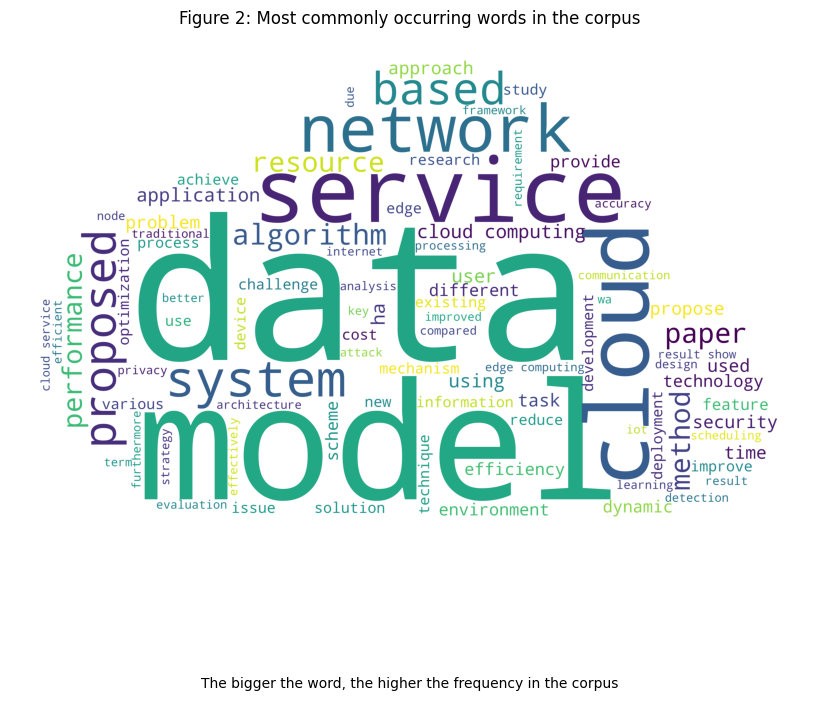

In [21]:
all_words = ""
for i in lemmatized_df:
    all_words += i

cloud_mask = np.array(Image.open("cloud.png"))

wordcloud = WordCloud(scale=10,
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    min_font_size=8,
                    mask=cloud_mask
            ).generate(all_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Figure 2: Most commonly occurring words in the corpus")
caption = "The bigger the word, the higher the frequency in the corpus"
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">APPLY TF-IDF</h1>
Use TF-IDF to yield better results by deemphasizing popular yet meaningless words like "a", "and", "the", etc.

Let's first start by seeing how many features there are in total.

In [22]:
def convert_to_tfidf(lemmatized_df, min_df, max_df):
    """Return tfidf df based on lemmatized text data"""
    vectorizer = TfidfVectorizer(
        token_pattern=r'[a-zA-Z]+',
        stop_words="english",
        min_df=min_df,
        max_df=max_df
    )
    tfidf_matrix = vectorizer.fit_transform(lemmatized_df)
    feature_names = vectorizer.get_feature_names_out()
    nonzeros = tfidf_matrix.sum(axis=1).nonzero()[0]
    tfidf_matrix = tfidf_matrix[nonzeros]
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_df

In [23]:
number_of_docs = len(lemmatized_df)
display_df = convert_to_tfidf(lemmatized_df, 1, number_of_docs)
display_df[0:3].style.set_caption(
    f"Table 3: Term-document matrix with min_df=0 {display_df.shape}"
    ).set_table_styles([{
    'selector': 'caption',
    'props': [('text-align', 'left')]
}])

,abc,ability,able,abnormal,absence,absolute,absolutely,abstract,abstracted,abstraction,abundant,ac,academic,accelerate,accelerated,accelerating,acceleration,accelerometer,acceptable,acceptance,accepted,access,accessed,accessibility,accessible,accessing,accommodate,accompanied,accomplish,accomplished,accomplishes,accomplishment,accordance,according,accordingly,account,accounting,accumulated,accuracy,accurate,accurately,achieve,achieved,achievement,achieves,achieving,acp,acquired,acquiring,acquisition,act,action,active,actively,activestandby,activity,actor,actorcritic,actual,actually,ad,adapt,adaptability,adaptable,adaptation,adapted,adapting,adaptive,adaptively,add,added,adding,addition,additional,additionally,additive,address,addressed,addressing,adenocarcinoma,adequately,adhoc,adjust,adjustment,administrative,administrator,admission,admissioninadmissionout,adnet,adopt,adoptable,adopted,adopting,adoption,adopts,advance,advanced,advancement,advancing,advantage,advantageous,advent,adversarial,adverse,aebs,aebss,aerial,affect,affected,affecting,affection,affordable,aforementioned,age,agent,agentbased,agenttoagent,aggravates,aggregate,aggregation,agile,agmnet,agreement,agricultural,agriculture,ahp,ai,aia,aiao,aid,aienabled,aifo,aifocused,ailbsm,aim,aimed,aiming,airground,alarm,alexnet,algorithm,algorithmga,algorithmsearch,alibaba,alleviate,alleviated,alliance,allinclusive,allocate,allocated,allocates,allocating,allocation,allow,allowing,allows,alreadyexisting,alter,alteration,altered,alternate,alternating,alternative,alwaysaccessible,ambient,amid,amplified,analyse,analysing,analysis,analyst,analytic,analytical,analytics,analyze,analyzed,analyzes,analyzing,anchor,anchored,anger,annual,anomaly,anomalydetecting,anonymity,anonymous,anova,ant,anymore,aoi,api,appealing,appearance,appearing,applicability,applicable,application,applicationbased,applied,apply,applying,approach,approached,appropriate,appropriately,approximate,approximately,approximates,approximation,apps,arbitrary,arbitration,architectural,architecture,area,argue,arimaxgboost,arise,arpscore,arrangement,array,arrival,article,artifact,artificial,ascii,asking,aspect,ass,assault,assessed,assessment,asset,assign,assigning,assignment,assigns,assist,assistance,assisted,assisting,associated,association,assumption,assure,ast,asthe,asynchronous,athlete,attack,attacker,attempt,attention,attitude,attracted,attracts,attribute,attributebased,auc,auction,auctionbased,audience,audit,augment,augmentation,augmented,authentic,authenticating,authentication,authenticity,authority,authorization,authorized,autoencoder,automate,automated,automatic,automatically,automation,autonomous,autoscaling,auvassisted,auvs,availability,available,avalanche,average,averaged,avoid,avoidance,avoiding,await,awakening,awareness,away,aws,azure,bachelor,backbone,backend,background,backhaul,backlog,backpropagation,backscatter,backscattering,backward,bag,balance,balanced,balancer,balancing,ban,band,bandwidth,barely,base,based,baseline,basic,basically,basis,basketball,batch,batching,bayesian,bcc,behalf,behavior,behaviour,belief,benchmark,beneath,benefit,benefiting,benign,ber,best,better,bias,bid,bidder,bidding,bidirectional,big,bilinear,billion,bilstm,bim,binary,binaryclass,binding,binpacking,biology,biomedical,bipartite,bipartition,bird,birth,bit,bitblock,bitmap,bitwise,black,block,blockchain,blockchainbased,blockchainenabled,blockchainside,blow,blowfish,blue,blurred,body,bohb,boiled,booming,boost,boosted,borrowed,borrows,bottleneck,bound,boundary,box,boy,bp,branch,breach,break,breakeven,bring,brings,broad,broadcast,broadcasting,broken,broker,brought,browser,browsing,budget,budgetbalanced,bug,build,building,built,burden,burgeoning,burrowsabadineedham,burst,business,businessappropriate,c,caas,cab,cache,caching,calculate,calculated,calculates,calculation,calculus,called,camera,campus,candidate,cantilever,capability,capacity,capital,capture,captured,car,care,carried,carry,carrying,cascade,cascading,case,cast,categorizatio

There are a total of 3805 features. Interesting! But as you can see, not all of these features seem relevant at all. Some of them seem like one-offs.

With that said, we should probably set our `min_df` and `max_df` to some reasonable value.

For illustration purposes, let's see what happens when we remove words that do not appear in at least 1% of the documents.

In [24]:
display_df = convert_to_tfidf(lemmatized_df, math.ceil(number_of_docs * 0.01), number_of_docs)[0:3]
display_df.style.set_caption(
    f"Table 4: Term-document matrix with min_df=1% of corpus {display_df.shape}"
    ).set_table_styles([{
    'selector': 'caption',
    'props': [('text-align', 'left')]
}])

Okay, so we halved our corpus. Let's try 3%.

In [25]:
tfidf_df = convert_to_tfidf(lemmatized_df, math.ceil(number_of_docs * 0.03), number_of_docs)
display_df = tfidf_df[0:3]
display_df.style.set_caption(
    f"Table 5: Term-document matrix with min_df=3% of corpus {tfidf_df.shape}"
    ).set_table_styles([{
    'selector': 'caption',
    'props': [('text-align', 'left')]
}])

709 features left. Okay, let's go with this. We don't want to risk losing too much information. Incremental changes in min_df has big effects on the number of the retained corpus. That means our dataset must be filled with one-off terms.

Let's graph how the number of terms change as the min_df increases.

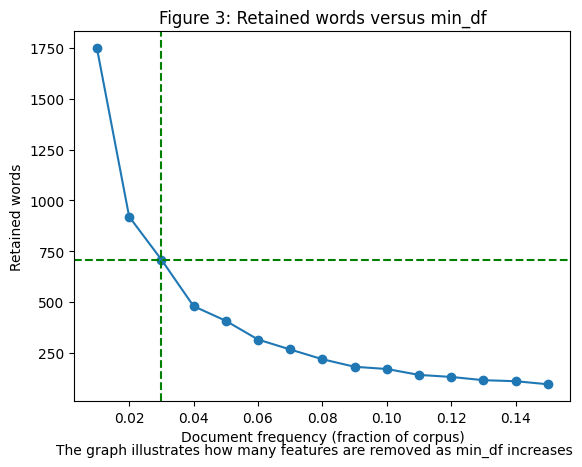

In [26]:
x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
     0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
y = []
for i in range(len(x)):
    temp = convert_to_tfidf(
        lemmatized_df,
        math.ceil(number_of_docs * x[i]),
        number_of_docs
    )
    y.append(temp.shape[1])

plt.plot(x,y,'-o')
plt.axhline(709, ls='--', color='g')
plt.axvline(0.03, ls='--', color='g')
plt.xlabel("Document frequency (fraction of corpus)")
plt.ylabel("Retained words")
plt.title("Figure 3: Retained words versus min_df")
caption = ("The graph illustrates how many features "
            "are removed as min_df increases")
plt.figtext(
    0.5,
    0,
    caption,
    wrap=True,
    horizontalalignment='center',
    fontsize=10
)
plt.show()

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">APPLY TRUNCATED SVD</h1>

* Apply SVD and extract $U$, $S$, $V$
* Reconstruct the original matrix `tfidf_df` to verify that it is working as expected
* Graph variance explained
* Graph cumulative variance explained
* Based on the graph, decide to take some number $r$ columns that is acceptable. This is the process of **truncation**

In [27]:
# extract decomposition
U, S, V = np.linalg.svd(tfidf_df, full_matrices=False)

# reconstruct the matrix
reconstructed_matrix = U @ np.diag(S) @ V

# verify that the original and reconstructed are the same
# thereby verifying that the decomposition is correct
np.allclose(reconstructed_matrix, tfidf_df.to_numpy())

feature_names = tfidf_df.columns.tolist()

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">VARIANCE AND CUMULATIVE VARIANCE EXPLAINED</h1>

We will use these graphs to understand how many SV's we need to create an acceptable approximation of the original document-term matrix.

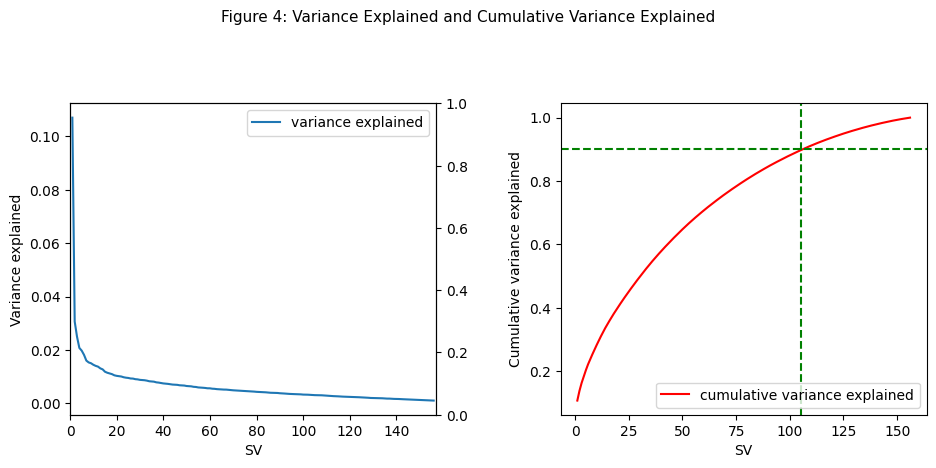

In [28]:
var_explained = np.square(S) / np.sum(np.square(S))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(
    range(1, len(var_explained)+1),
    var_explained,
    '-',
    label="variance explained"
)
ax1.legend(loc="upper right")
ax1.set_xlim(0, len(var_explained)+1)
ax1.set_xlabel('SV')
ax2.set_xlabel('SV')
ax1.set_ylabel('Variance explained')
ax1 = ax1.twinx()
ax2.plot(
    range(1, len(var_explained)+1),
    var_explained.cumsum(),
    'r-',
    label='cumulative variance explained'
)
ax2.axhline(0.9, ls='--', color='g')
ax2.axvline(105, ls='--', color='g')
plt.suptitle(
    f"Figure 4: Variance Explained and Cumulative Variance Explained",
    fontsize=11,
    ha='center'
)
ax2.set_ylabel('Cumulative variance explained')
ax2.legend(loc="lower right")
plt.tight_layout(pad=3)
plt.show()

from 709 dimensions to 105 dimensions in order to explain approximately 90% variance. Not bad at all!

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">TOP K SINGULAR VECTORS</h1>
An SV corresponds to a topic. Let's see what words and associated with which topics.

We should look at the absolute values of the expression of each word in a topic because a word that has a strong negative representation is just as important as a word that has a strong positive representation. 

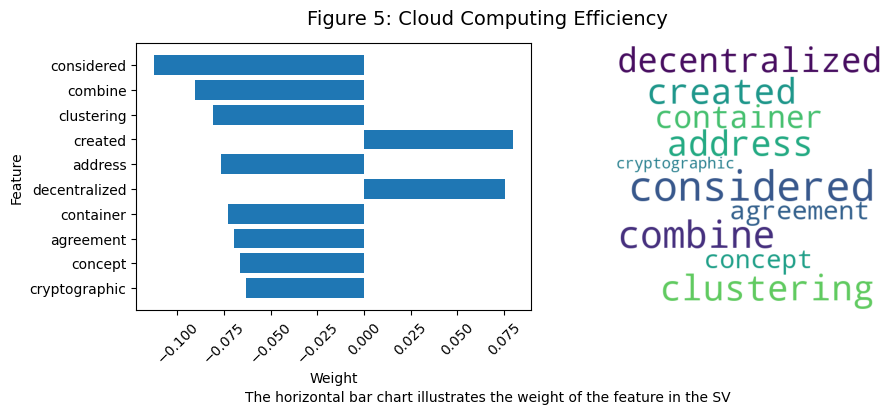

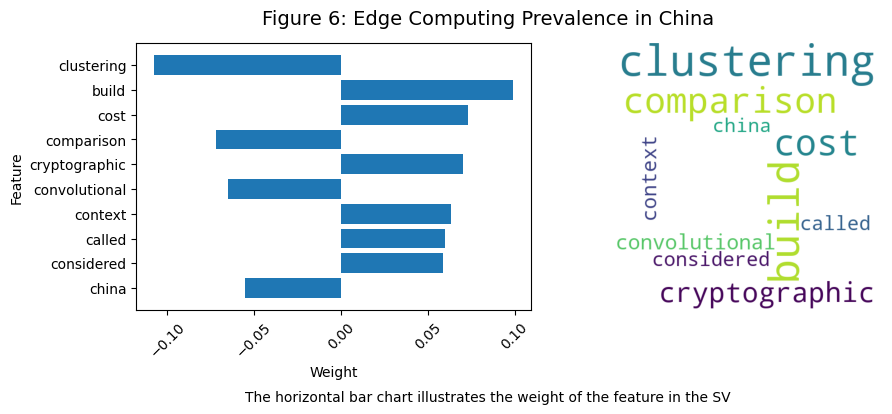

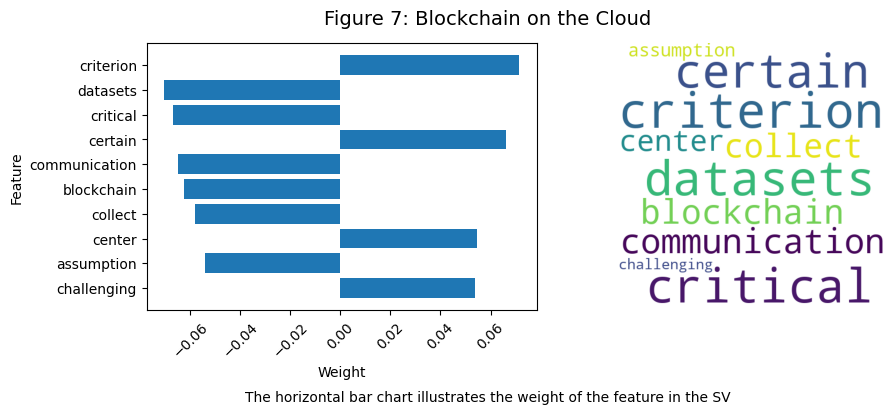

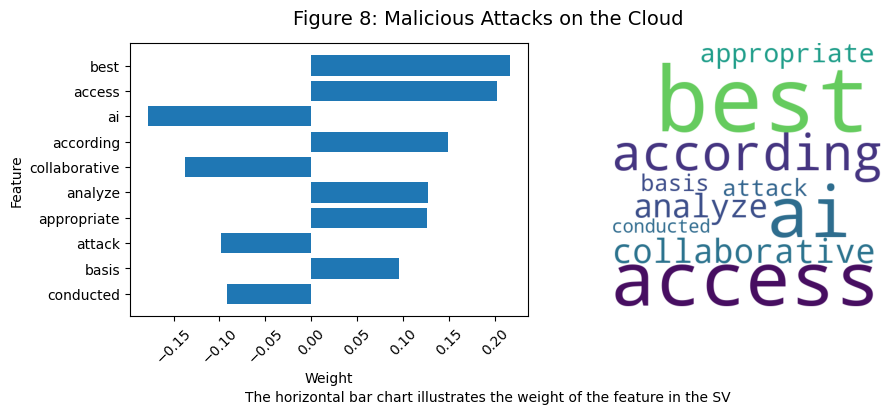

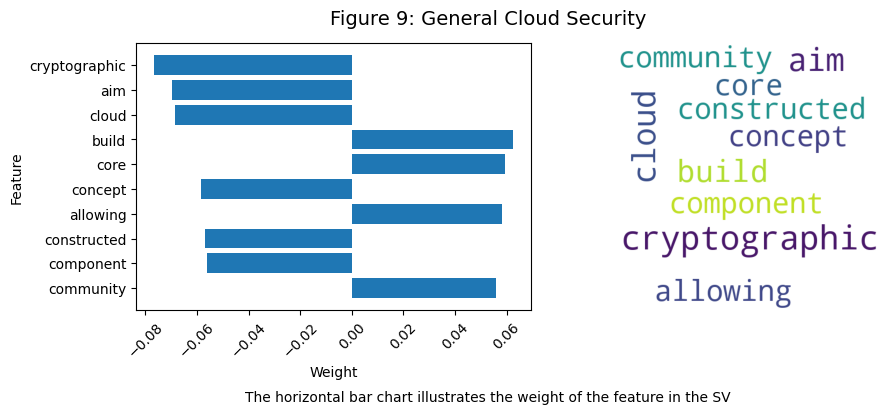

In [29]:
topics = [
    "Cloud Computing Efficiency",
    "Edge Computing Prevalence in China",
    "Blockchain on the Cloud",
    "Malicious Attacks on the Cloud",
    "General Cloud Security"
]
k=5
for i in range(k):
    freq_dict = {}
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    order = np.argsort(np.abs(V[:, i]))[-10:]
    ax1.barh([feature_names[o] for o in order], V[order, i])
    ax1.tick_params(axis='x', rotation=45)
    for j in order:
        freq_dict[feature_names[j]] = abs(V[j, i]) * 10
    wordcloud = WordCloud(
                    width=500, 
                    height=500,
                    background_color='white',
                    stopwords=set(STOPWORDS)
                ).generate_from_frequencies(freq_dict)
    ax2.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=3)
    plt.suptitle(f"Figure {5+i}: {topics[i]}", fontsize=14, ha='center')
    caption = ("The horizontal bar chart illustrates "
                "the weight of the feature in the SV")
    ax1.set_xlabel("Weight")
    ax1.set_ylabel("Feature")
    plt.figtext(
        0.5,
        0.001,
        caption,
        wrap=True,
        horizontalalignment='center',
        fontsize=10
    )
    plt.show()

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080; border: 1px solid #ffffff; padding: 10px 0;">DATA POINTS</h1>

Below is a scatterplot of the projected points on SV1 and SV2.

Notice that more than half of the data seems ot lie at the negative SV2 whereas all of the data lie in the negative SV1. What does it mean? The relevance of the topics to each data point is defined here. For instance, a data point in the far negative side of SV1 and SV2 is likely related to the negatively weighted features of those SV's.


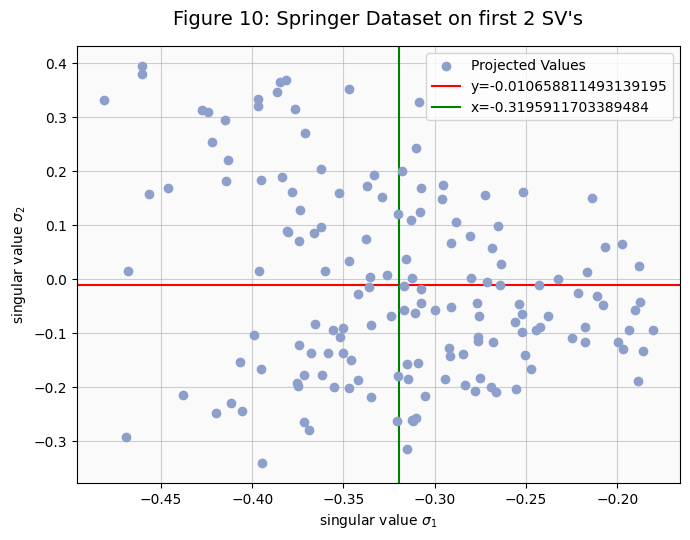

In [30]:
projected_points = tfidf_df.to_numpy().dot(V.T)
x = projected_points[:, 0]
y = projected_points[:, 1]

fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(x,
            y,
            marker='o',
            color='#8da0cb',
            label='Projected Values',
            zorder=1000)

plt.legend(loc='upper right', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('Figure 10: Springer Dataset on first 2 SV\'s',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')
ax.axhline(y.mean(), color='r', label=f"y={y.mean()}")
ax.axvline(x.mean(), color='g', label=f"x={x.mean()}")
ax.legend()

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080;border: 1px solid #ffffff; padding: 10px 0;">CONCLUSION</h1>
It looks like in the year 2023, we're all about efficient, secure, and fast computing--whether it be on the edge or otherwise. Researchers are looking to find an intersection between blockchain technology and increased efficienct, 

* In the year 2023, we're all about efficient, secure, and fast computing. Researchers are constantly looking for ways to improve existing cloud architecture.
* Edge computing is becoming an increasingly popular technology because of increased processing speed, and volumes. Additionally, because data is being processed locally, there is a cost reduction in terms of processing and storage.
* China is taking the lead especially with leveraging edge technology.
* Researchers are finding intersections between blockchain technology and the cloud. We can probably expect Edge computing and blockchain to have some kind of synergy in the future.
* Cloud security is becoming an increasing concern, especially as more public and private entities start migrating sensitive data to the cloud.

Based on the results, it seems that the top 5 topics are the following:

| Topic Number | Title | Description |
| --------------- | --------------- | --------------- |
| 1 | Cloud Computing Efficiency   | Some key terms here are clustering, decentralized, cryptographic, and container. All these point to potential improvements in cloud computing in terms of efficiency.    |
| 2 | Edge Computing Prevalence in China    | Based on manual annotation, it can be verified by the team that a lot of the articles indeed talk about Edge Computing and how it is used to improve services in China.    |
| 3 | Blockchain on the Cloud    | This is somewhat related to topic 1, wherein articles speak of decentralization in Cloud Computing. Blockchain is one of the technologies that enables decentralization.    |
| 4 | Malicious attacks on the cloud   | One of the forefronts of cloud computing research is on how to analyze and thwart attack vectors.    |
| 5 | General Cloud Security    | This is in connection with Topic 4 -- we are seeing articles that speak of encryption improvement.    |

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080;border: 1px solid #ffffff; padding: 10px 0;">RECOMMENDATIONS</h1>
To take this study forward, the following can be done:

1. Use a bigger dataset. It might be worth looking at other academic websites like [Science Direct](https://sciencedirect.com) for cloud computing articles in order to enhance the corpus.
2. Consider including vendor-specific articles to identify key trends for each.
3. Try other dimensionality reduction techniques like Non-negative Matrix Factorization (NMF) and Latent Dirichlet Allocation (LDA).
4. Try using word embedding models like GloVe or Word2Vec.
5. Perform some clustering method on the data such as K-means.

<a id='TContents'></a>
<h1 style="color:#FF6600; background-color:#000080;border: 1px solid #ffffff; padding: 10px 0;">REFERENCES</h1>

[[1] Aggarwal, C. C. (2015). Data Mining: The textbook. Springer.](https://link.springer.com/book/10.1007/978-3-319-14142-8)

[[2] Gartner. (2023, April 19). Gartner Forecasts Worldwide Public Cloud End-User Spending to Reach Nearly $600 Billion in 2023. Gartner Newsroom.](https://www.gartner.com/en/newsroom/press-releases/2023-04-19-gartner-forecasts-worldwide-public-cloud-end-user-spending-to-reach-nearly-600-billion-in-2023)